In [74]:
#import some necessary librairies

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)


from scipy import stats
from scipy.stats import norm, skew #for some statistics


In [75]:
df = pd.read_csv('dataSetFull.csv')

## Removing Data without Target

In [76]:
# Drop rows that has NaN values on Target
df2=df.dropna(subset=['price_tnd'])

In [77]:
bad_label_cols=['price_eur']

In [78]:
Drop_X_train = df2.drop(bad_label_cols, axis=1)

In [79]:
#Save the 'Id' column
Drop_X_train_ID = Drop_X_train ['id']

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
Drop_X_train.drop("id", axis = 1, inplace = True)


## Data Processing

In [81]:
Drop_X_train.describe()


,price_tnd,Area,pieces,room,bathroom,state,latt,long,distance_to_capital,garage,garden,concierge,beach_view,mountain_view,pool,elevator,furnished,equipped_kitchen,central_heating,air_conditioning
count,6.421000e+03,6314.000000,5592.000000,6046.000000,5879.000000,5504.000000,6410.000000,6410.000000,6410.000000,6421.000000,6421.0,6421.000000,6421.000000,6421.000000,6421.000000,6421.000000,6421.000000,6421.000000,6421.000000,6421.000000
mean,6.812867e+05,361.579031,4.325823,3.277208,1.999660,1.388990,36.428312,10.409444,64.675436,0.472201,0.0,0.256969,0.103099,0.077558,0.236723,0.273010,0.040959,0.581841,0.584644,0.570783
std,8.825321e+05,979.547399,2.253888,1.918928,1.200686,0.568443,1.117034,0.380125,122.687061,0.499265,0.0,0.436996,0.304112,0.267496,0.425104,0.445541,0.198212,0.493295,0.492822,0.495003
min,6.500000e+03,20.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.003560,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.600000e+05,117.000000,3.000000,2.000000,1.000000,1.000000,36.401080,10.217961,11.345082,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.200000e+05,175.000000,4.000000,3.000000,2.000000,1.000000,36.830170,10.325278,17.722190,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
75%,7.800000e+05,362.750000,5.000000,4.000000,2.000000,2.000000,36.876389,10.614570,72.825068,1.000000,0.0,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,1.900000e+07,22000.000000,26.000000,42.000000,14.000000,2.000000,37.363996,11.331493,4224.947771,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Outliers

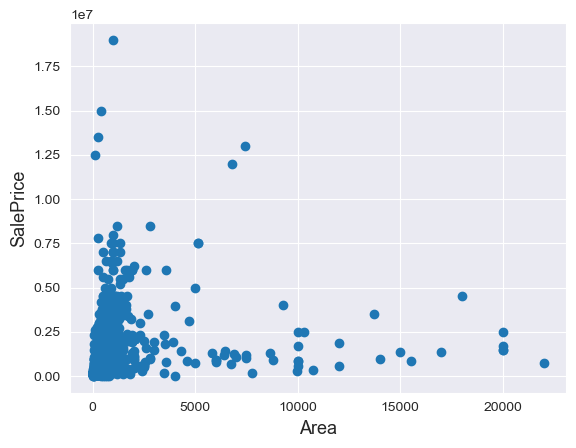

In [82]:
fig, ax = plt.subplots()
ax.scatter(x = Drop_X_train['Area'], y = Drop_X_train['price_tnd'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('Area', fontsize=13)
plt.show()

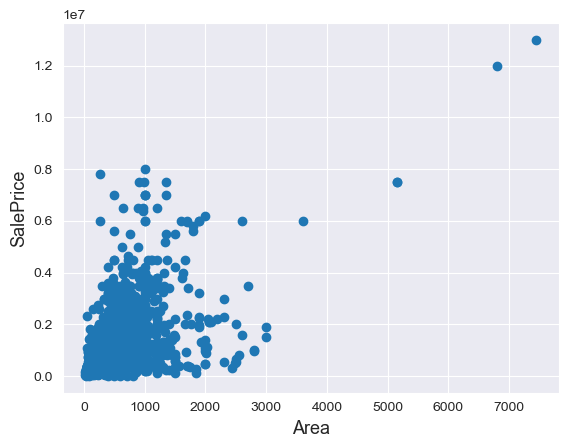

In [86]:
#Deleting outliers
Drop_X_train1 = Drop_X_train.drop(Drop_X_train[(Drop_X_train['Area']<5000) & (Drop_X_train['price_tnd']>0.800000e+07)].index)
Drop_X_train1 = Drop_X_train1.drop(Drop_X_train1[(Drop_X_train1['Area']>3000) & (Drop_X_train1['price_tnd']<6.00000e+06)].index)




#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(x = Drop_X_train1['Area'], y = Drop_X_train1['price_tnd'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('Area', fontsize=13)
plt.show()

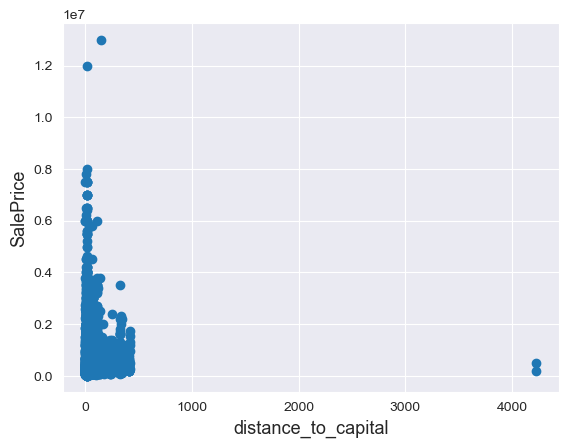

In [87]:

fig, ax = plt.subplots()
ax.scatter(x = Drop_X_train1['distance_to_capital'], y = Drop_X_train1['price_tnd'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('distance_to_capital', fontsize=13)
plt.show()

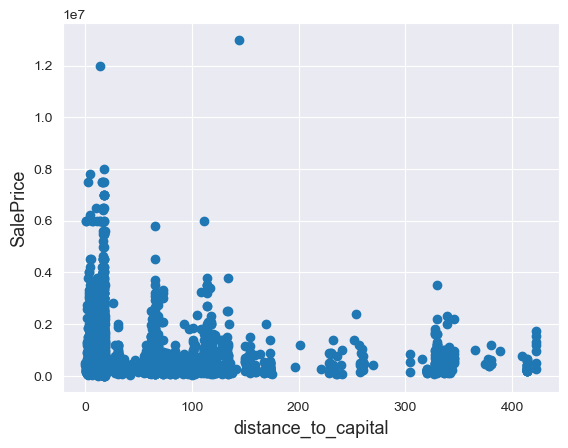

In [88]:
#Deleting outliers
Drop_X_train1 = Drop_X_train1.drop(Drop_X_train1[(Drop_X_train1['distance_to_capital']>600)  ].index)

#Check the graphic again

fig, ax = plt.subplots()
ax.scatter(x = Drop_X_train1['distance_to_capital'], y = Drop_X_train1['price_tnd'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('distance_to_capital', fontsize=13)
plt.show()

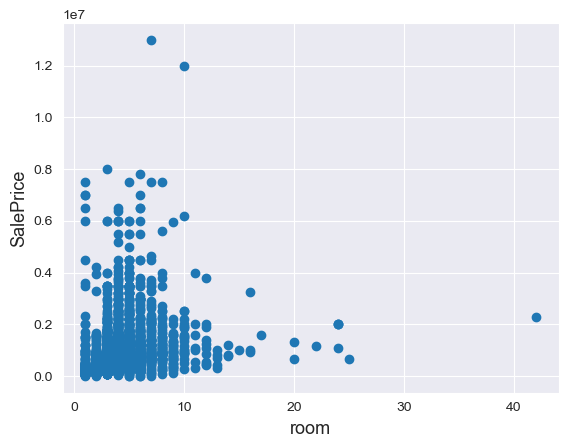

In [89]:

fig, ax = plt.subplots()
ax.scatter(x = Drop_X_train1['room'], y = Drop_X_train1['price_tnd'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('room', fontsize=13)
plt.show()

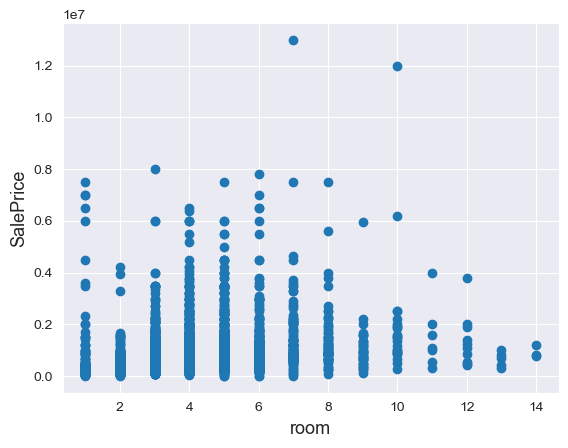

In [90]:
#Deleting outliers
Drop_X_train1 = Drop_X_train1.drop(Drop_X_train1[(Drop_X_train1['room']>14)  & (Drop_X_train1['price_tnd']<0.50000e+07)].index)

fig, ax = plt.subplots()
ax.scatter(x = Drop_X_train1['room'], y = Drop_X_train1['price_tnd'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('room', fontsize=13)
plt.show()

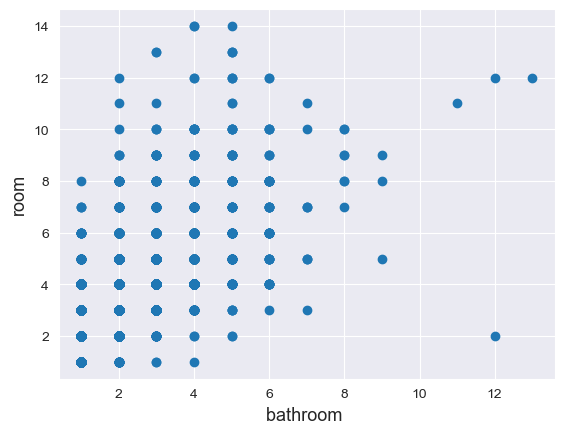

In [91]:
fig, ax = plt.subplots()
ax.scatter(x = Drop_X_train1['bathroom'], y = Drop_X_train1['room'])
plt.ylabel('room', fontsize=13)
plt.xlabel('bathroom ', fontsize=13)
plt.show()

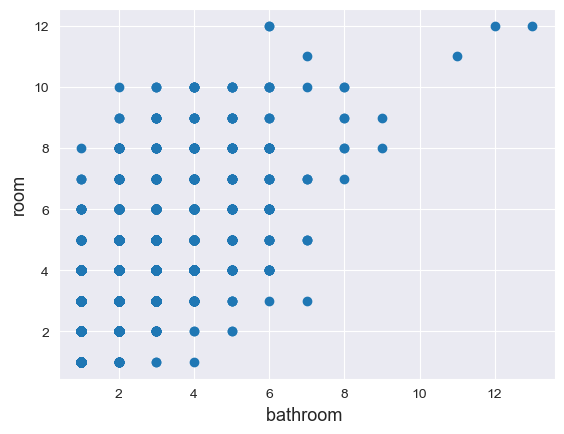

In [94]:
#Deleting outliers
Drop_X_train1 = Drop_X_train1.drop(Drop_X_train1[(Drop_X_train1['room']<6)  & (Drop_X_train1['bathroom']>8)].index)
Drop_X_train1 = Drop_X_train1.drop(Drop_X_train1[(Drop_X_train1['room']>10)  & (Drop_X_train1['bathroom']<5)].index)

fig, ax = plt.subplots()
ax.scatter(x = Drop_X_train1['bathroom'], y = Drop_X_train1['room'])
plt.ylabel('room', fontsize=13)
plt.xlabel('bathroom ', fontsize=13)
plt.show()


In [96]:
Drop_X_train1.describe()

,price_tnd,Area,pieces,room,bathroom,state,latt,long,distance_to_capital,garage,garden,concierge,beach_view,mountain_view,pool,elevator,furnished,equipped_kitchen,central_heating,air_conditioning
count,6.331000e+03,6225.000000,5516.000000,5958.000000,5792.000000,5421.000000,6320.000000,6320.000000,6320.000000,6331.000000,6331.0,6331.000000,6331.000000,6331.000000,6331.000000,6331.000000,6331.000000,6331.000000,6331.000000,6331.000000
mean,6.609320e+05,288.892851,4.272299,3.192179,1.966333,1.390149,36.446655,10.414757,62.571838,0.471963,0.0,0.258885,0.103459,0.075344,0.235192,0.276102,0.040436,0.582215,0.586479,0.571948
std,7.856164e+05,333.304106,2.114450,1.580951,1.123556,0.569170,0.789435,0.305869,83.169901,0.499253,0.0,0.438057,0.304582,0.263966,0.424152,0.447103,0.196995,0.493233,0.492503,0.494836
min,6.500000e+03,20.000000,1.000000,1.000000,1.000000,0.000000,32.960600,8.084552,0.003560,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.600000e+05,117.000000,3.000000,2.000000,1.000000,1.000000,36.401080,10.217961,11.345082,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.200000e+05,172.000000,4.000000,3.000000,2.000000,1.000000,36.830170,10.325278,17.722190,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
75%,7.650000e+05,350.000000,5.000000,4.000000,2.000000,2.000000,36.876389,10.614570,72.825068,1.000000,0.0,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,1.300000e+07,7443.000000,21.000000,12.000000,13.000000,2.000000,37.363996,11.331493,422.433794,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Target Variable


 mu = 663570.10 and sigma = 786339.81



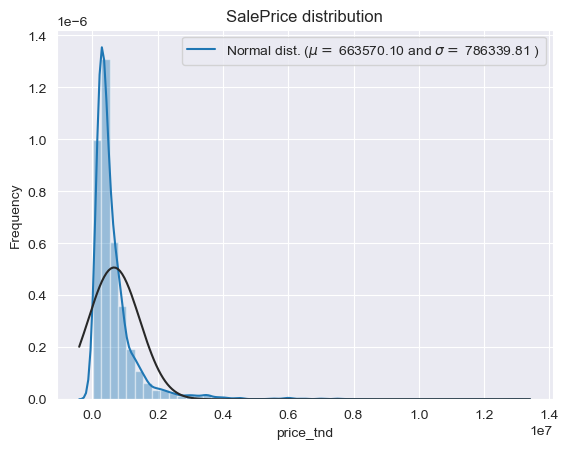

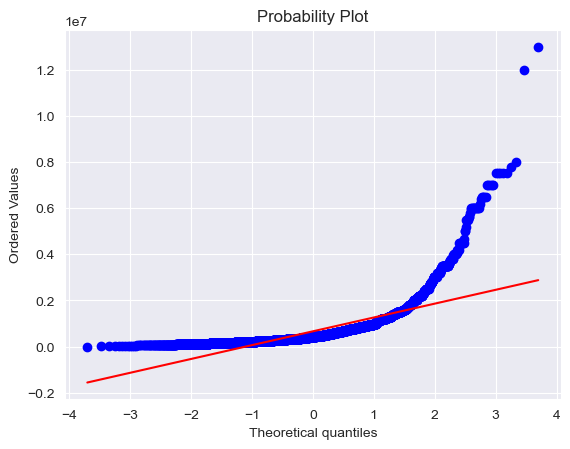

In [48]:
sns.distplot(Drop_X_train1['price_tnd'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(Drop_X_train1['price_tnd'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(Drop_X_train1['price_tnd'], plot=plt)
plt.show()


 mu = 13.03 and sigma = 0.81



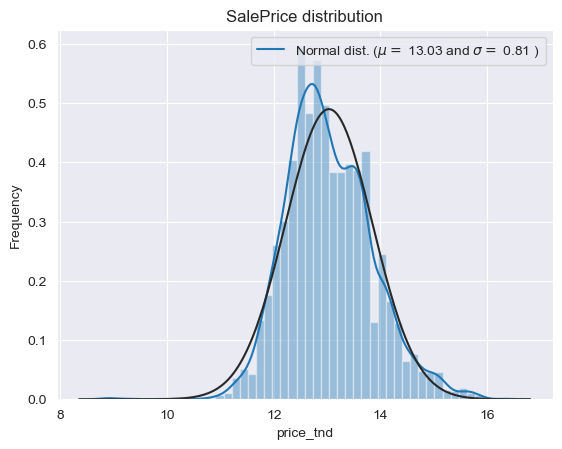

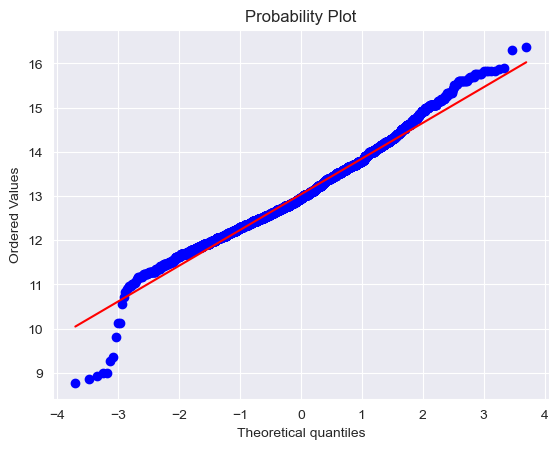

In [49]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
Drop_X_train1["price_tnd"] = np.log1p(Drop_X_train1["price_tnd"])

#Check the new distribution 
sns.distplot(Drop_X_train1['price_tnd'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(Drop_X_train1['price_tnd'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(Drop_X_train1['price_tnd'], plot=plt)
plt.show()

## Feature engineering

### Categorical Data

In [171]:
good_label_cols=['governorate']

In [170]:
Drop_X_train3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6214 entries, 7 to 8078
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price_tnd            6214 non-null   float64
 1   location             6214 non-null   object 
 2   governorate          6214 non-null   object 
 3   Area                 6214 non-null   float64
 4   pieces               5427 non-null   float64
 5   room                 5850 non-null   float64
 6   bathroom             5688 non-null   float64
 7   latt                 6214 non-null   float64
 8   long                 6214 non-null   float64
 9   distance_to_capital  6214 non-null   float64
 10  garage               6214 non-null   int64  
 11  concierge            6214 non-null   int64  
 12  beach_view           6214 non-null   int64  
 13  mountain_view        6214 non-null   int64  
 14  pool                 6214 non-null   int64  
 15  elevator             6214 non-null   i

In [173]:
from sklearn.preprocessing import LabelEncoder

# create label encoder
lee = LabelEncoder()

# fit and transform label encoder on a categorical column
Drop_X_train3['governorate'] = lee.fit_transform(Drop_X_train3['governorate'])
Drop_X_train3.head()

,price_tnd,location,governorate,Area,pieces,room,bathroom,latt,long,distance_to_capital,garage,concierge,beach_view,mountain_view,pool,elevator,furnished,equipped_kitchen,central_heating,air_conditioning
7,1200000.0,Midoun,5,370.0,21.0,9.0,5.0,33.866667,10.850000,329.885067,1,0,0,0,1,0,0,0,0,0
8,3200000.0,El Kantaoui,0,1899.0,20.0,5.0,7.0,35.856900,10.597200,113.681036,0,0,0,0,1,0,0,1,1,1
10,2000000.0,Kélibia,16,462.0,20.0,12.0,13.0,36.894199,10.276223,14.249053,0,0,1,0,0,0,1,1,1,1
18,650000.0,Raoued,1,400.0,17.0,9.0,4.0,36.957511,10.225744,17.242821,1,0,0,0,0,0,0,1,1,1
19,110000.0,Tezdaine,5,220.0,17.0,9.0,4.0,33.803966,11.040065,341.757988,0,0,0,0,1,0,1,1,0,1


In [174]:
from sklearn.preprocessing import LabelEncoder

# create label encoder
lee = LabelEncoder()

# fit and transform label encoder on a categorical column
Drop_X_train3['location'] = lee.fit_transform(Drop_X_train3['location'])
Drop_X_train3.head()

,price_tnd,location,governorate,Area,pieces,room,bathroom,latt,long,distance_to_capital,garage,concierge,beach_view,mountain_view,pool,elevator,furnished,equipped_kitchen,central_heating,air_conditioning
7,1200000.0,271,5,370.0,21.0,9.0,5.0,33.866667,10.850000,329.885067,1,0,0,0,1,0,0,0,0,0
8,3200000.0,156,0,1899.0,20.0,5.0,7.0,35.856900,10.597200,113.681036,0,0,0,0,1,0,0,1,1,1
10,2000000.0,228,16,462.0,20.0,12.0,13.0,36.894199,10.276223,14.249053,0,0,1,0,0,0,1,1,1,1
18,650000.0,303,1,400.0,17.0,9.0,4.0,36.957511,10.225744,17.242821,1,0,0,0,0,0,0,1,1,1
19,110000.0,350,5,220.0,17.0,9.0,4.0,33.803966,11.040065,341.757988,0,0,0,0,1,0,1,1,0,1


#### Missing Data

In [98]:
# Get names of columns with missing values
cols_with_missing = [col for col in Drop_X_train1.columns
                     if Drop_X_train1[col].isnull().any()]

In [99]:
cols_with_missing

['city',
 'Area',
 'pieces',
 'room',
 'bathroom',
 'age',
 'state',
 'latt',
 'long',
 'distance_to_capital']

In [129]:
Drop_X_train1.columns

Index(['price_tnd', 'location', 'city', 'governorate', 'Area', 'pieces',
       'room', 'bathroom', 'age', 'state', 'latt', 'long',
       'distance_to_capital', 'garage', 'garden', 'concierge', 'beach_view',
       'mountain_view', 'pool', 'elevator', 'furnished', 'equipped_kitchen',
       'central_heating', 'air_conditioning'],
      dtype='object')

In [117]:
print(Drop_X_train1.isnull().sum())

price_tnd                 0
location                  0
city                    992
governorate               0
Area                    106
pieces                  813
room                    373
bathroom                538
age                    3343
state                   908
latt                      0
long                      0
distance_to_capital       0
garage                    0
garden                    0
concierge                 0
beach_view                0
mountain_view             0
pool                      0
elevator                  0
furnished                 0
equipped_kitchen          0
central_heating           0
air_conditioning          0
dtype: int64


### features distribution

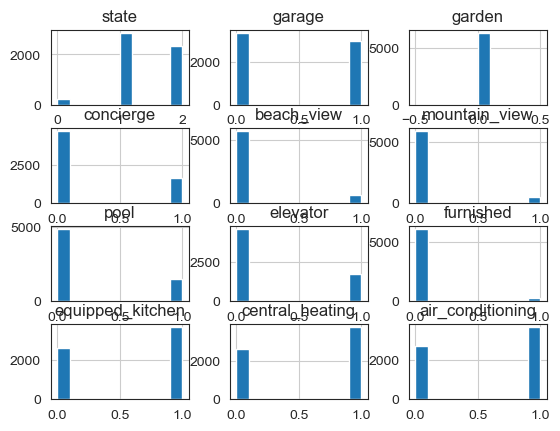

In [132]:
columns=['state','garage', 'garden', 'concierge', 'beach_view',
       'mountain_view', 'pool', 'elevator', 'furnished', 'equipped_kitchen',
       'central_heating', 'air_conditioning']
Drop_X_train1[columns].hist();

In [133]:
bad_label_cols=['garden','age']
Drop_X_train2 = Drop_X_train1.drop(bad_label_cols, axis=1)

In [178]:
print(Drop_X_train3.isnull().sum())

price_tnd                0
location                 0
governorate              0
Area                     0
pieces                 787
room                   364
bathroom               526
latt                     0
long                     0
distance_to_capital      0
garage                   0
concierge                0
beach_view               0
mountain_view            0
pool                     0
elevator                 0
furnished                0
equipped_kitchen         0
central_heating          0
air_conditioning         0
dtype: int64


We should drop the garden feature ( ALL zeros )

In [116]:
Drop_X_train1=Drop_X_train1.dropna(subset=['latt','long'])

In [158]:
bad_label_cols=['city','state']
Drop_X_train3=Drop_X_train2.drop(bad_label_cols, axis=1)

In [160]:
Drop_X_train3=Drop_X_train3.dropna(subset=['Area'])

In [176]:
from sklearn.impute import SimpleImputer

In [177]:
# Imputation
my_imputer = SimpleImputer(strategy='median')
imputed_X_train = pd.DataFrame(my_imputer.fit_transform(Drop_X_train3))

# Imputation removed column names; put them back
imputed_X_train.columns = Drop_X_train3.columns

In [179]:
imputed_X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6214 entries, 0 to 6213
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price_tnd            6214 non-null   float64
 1   location             6214 non-null   float64
 2   governorate          6214 non-null   float64
 3   Area                 6214 non-null   float64
 4   pieces               6214 non-null   float64
 5   room                 6214 non-null   float64
 6   bathroom             6214 non-null   float64
 7   latt                 6214 non-null   float64
 8   long                 6214 non-null   float64
 9   distance_to_capital  6214 non-null   float64
 10  garage               6214 non-null   float64
 11  concierge            6214 non-null   float64
 12  beach_view           6214 non-null   float64
 13  mountain_view        6214 non-null   float64
 14  pool                 6214 non-null   float64
 15  elevator             6214 non-null   f

#### Corrolation data

<AxesSubplot:>

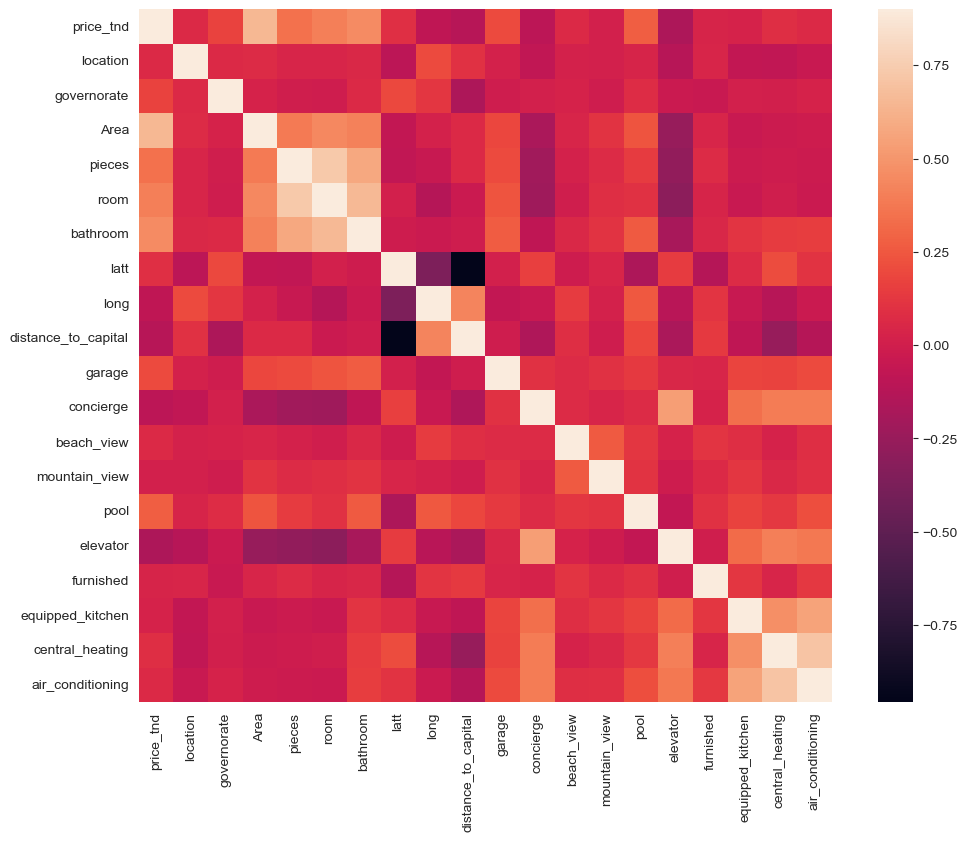

In [181]:
#Correlation map to see how features are correlated with SalePrice
corrmat = imputed_X_train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

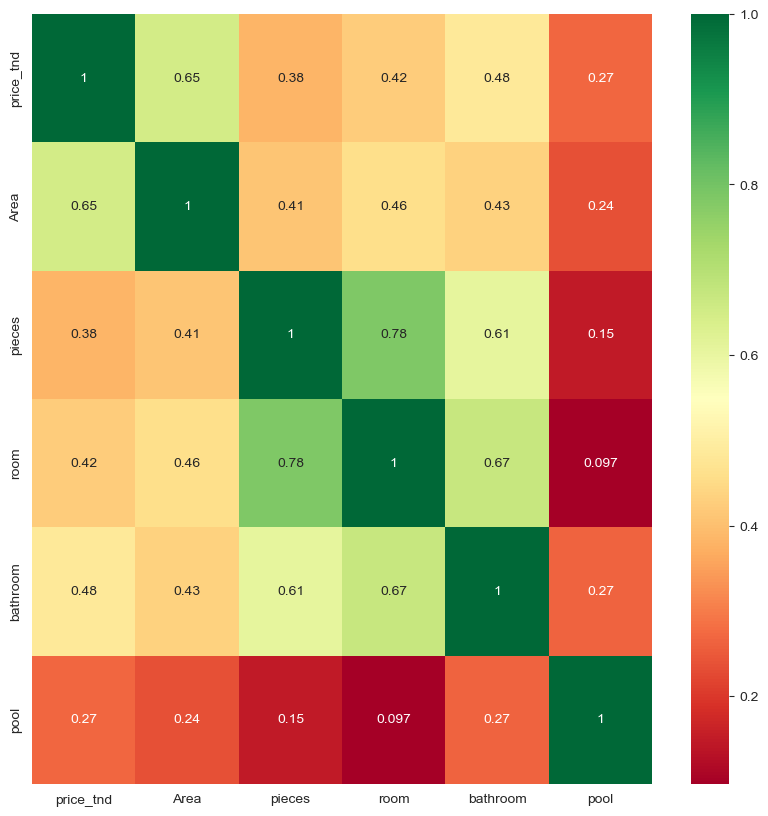

In [180]:
# most correlated features
corrmat = imputed_X_train.corr()
top_corr_features = corrmat.index[abs(corrmat["price_tnd"])>0.2]
plt.figure(figsize=(10,10))
g = sns.heatmap(Drop_X_train1[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [182]:
print("Find most important features relative to target")
corr = imputed_X_train.corr()
corr.sort_values(["price_tnd"], ascending = False, inplace = True)
print(corr.price_tnd)
#this you can see at the time of heatmap also.

Find most important features relative to target
price_tnd              1.000000
Area                   0.649759
bathroom               0.454170
room                   0.403403
pieces                 0.343986
pool                   0.270690
garage                 0.197909
governorate            0.174108
latt                   0.092833
central_heating        0.082658
air_conditioning       0.062982
beach_view             0.062278
location               0.058764
furnished              0.029753
equipped_kitchen       0.029457
mountain_view          0.014458
long                  -0.083537
concierge             -0.096467
distance_to_capital   -0.116072
elevator              -0.161174
Name: price_tnd, dtype: float64


### More Feature Engineerings

##### INPUT city from latt and long using geoapi

In [155]:
def Input_cities(lat,long):
    ch=str(lat)+', '+str(long)
    geolocator = Nominatim(user_agent="Starter_notebook")
    location = geolocator.reverse(ch,language='fr')
    l=list(location.raw['address'].keys())
    if ('city_district' in l):
        return(location.raw['address']['city_district'])
        
    else :
        return(location.raw['address']['state_district'])

In [ ]:
# Parcourez chaque ligne du dataframe
for index, row in df3.iterrows():
   
    # Vérifiez si les cellules de longitude et de latitude sont vides
    if pd.isnull(df3.loc[index, 'city']):
        try:
            Input_cities(row['latt'],row['long'])
        except KeyError as e:
            # Si une erreur de clé est survenue, imprimez un message d'erreur et passez à la ligne suivante
            print(f"Erreur lors de l'accès à la colonne {e}: la colonne est peut-être absente du dataframe")
            continue
        except GeolocatorError as e:
            # Si une autre erreur est survenue, imprimez un message d'erreur et passez à la ligne suivante
            print(f"Erreur lors de la géolocalisation de l'adresse {row['adresse']}: {e}")
            continue
    
        # Récupérez les valeurs de longitude et de latitude
        city = Input_cities(row['latt'],row['long'])

        # Ajoutez les valeurs de longitude et de latitude au dataframe
        df3.loc[index, 'city'] = city

## Split data to train and test

In [221]:
from sklearn.model_selection import train_test_split
  

X= imputed_X_train.drop(['price_tnd','mountain_view'], axis=1)
y= imputed_X_train['price_tnd']
  
# using the train test split function
X_train, X_test,y_train, y_test = train_test_split(X,y ,
                                   random_state=104, 
                                   test_size=0.25, 
                                   shuffle=True)
  

## Modeling

##### Defining cross_val_score function for both train and test sets separately

In [222]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

In [223]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Function for comparing different approaches
def score_dataset(X_train, X_valid, y_train, y_valid):
    model = XGBRegressor()
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return mean_absolute_error(y_valid, preds)

In [224]:
score_dataset(X_train, X_test, y_train, y_test)

196378.25780495896